<a href="https://colab.research.google.com/github/akritikts/Adversarial-Attacks-on-Computer-Vision/blob/master/plotting_trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

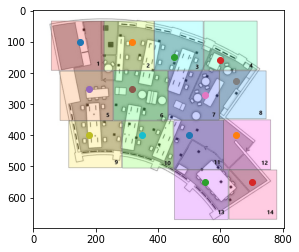

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread("grids.jpg")
implot = plt.imshow(im)

# put a blue dot at (10, 20)
plt.scatter([150], [100])
plt.scatter([315], [100])
plt.scatter([450], [150])
plt.scatter([600], [160])

plt.scatter([180], [250])
plt.scatter([315], [250])
plt.scatter([550], [270])
plt.scatter([650], [225])

plt.scatter([180], [400])
plt.scatter([350], [400])
plt.scatter([500], [400])
plt.scatter([650], [400])

plt.scatter([550], [550])
plt.scatter([700], [550])


# put a red dot, size 40, at 2 locations:
#plt.scatter(x=[30, 40], y=[50, 60], c='r', s=40)

plt.show()

In [ ]:
def clean_data(df):
  nearby_grids = [[2, 5], 
                  [1, 3, 5, 6], 
                  [2, 4, 6, 7], 
                  [3, 7, 8], 
                  [1, 2, 6, 9, 10], 
                  [2, 5, 7, 9, 10], 
                  [3, 6, 8, 11], 
                  [4, 7, 12], 
                  [5, 6, 10], 
                  [6, 7, 9, 11], 
                  [6, 7, 10, 12, 13], 
                  [8, 11, 13, 14], 
                  [11, 12, 14], 
                  [11, 12, 13]]
  seating_locations = {'00:fa:b6:01:da:5a': 10, 
                       '00:fa:b6:02:11:50': 6, 
                       '00:fa:b6:02:11:62': 6,
                       '00:fa:b6:02:11:86': 3,
                       '00:fa:b6:02:12:04': 5,
                       '00:fa:b6:02:12:2b': 7,
                       '00:fa:b6:02:12:2e': 13,
                       '00:fa:b6:02:12:37': 10,
                       '00:fa:b6:02:12:4c': 5,
                       '00:fa:b6:02:12:4f': 3,
                       '00:fa:b6:02:12:64': 3,
                       '00:fa:b6:02:12:73': 5,
                       '00:fa:b6:02:12:76': 10
                       }
  # for each day
  tagID = df['tag_id'].iloc[0]
  nseating_locations = {'00:fa:b6:01:da:5a': [11], 
                       '00:fa:b6:02:11:50': [1, 3], 
                       '00:fa:b6:02:11:62': [2, 3],
                       '00:fa:b6:02:11:86': [2, 7],
                       '00:fa:b6:02:12:04': [9],
                       '00:fa:b6:02:12:2b': [13],
                       '00:fa:b6:02:12:2e': [13],
                       '00:fa:b6:02:12:37': [2, 5],
                       '00:fa:b6:02:12:4c': [5],
                       '00:fa:b6:02:12:4f': [6, 7],
                       '00:fa:b6:02:12:64': [2, 6],
                       '00:fa:b6:02:12:73': [5],
                       '00:fa:b6:02:12:76': [ 5]
                       }
  # for each day
  tagID = df['tag_id'].iloc[0]
  sl = seating_locations[tagID]
  nsl = nseating_locations[tagID]
  print("Seating location default:", sl)
  # for j in range(9, 17):
  #   df1 = df[( (dft['hour'] == j))]
  #   print("Number of unique grids visited between the hour:", j, "and:", j+1, ":", df1['grid_id'].nunique())
  #     #print("Most common grid location of hour:"+str(j)+" on day of week: "+str(i)+" is: ", df1['grid_id'].value_counts().nlargest(1))
  #     #print("Five most used grids of hour:"+str(j)+" on day of week: "+str(i)+" are: \n", df1['grid_id'].value_counts().nlargest(5))

  #   print("before")
  #   fig = plt.figure(figsize = (10, 5))
  #   plt.scatter(df1['minute'], df1['grid_id'])
  #   plt.plot(df1['minute'], df1['grid_id'])
  #   plt.show()
  for i, row in df.iterrows():
    if(row['Time_Since_Change']<=0.66):
      if(row['previous_grid'] == row['next_grid']):
        #s = row['grid_id']
        #print("s", s)
        if(row['grid_id'] in nearby_grids[sl-1]):
          df['grid_id'].iloc[i] = sl
        
  # for j in range(9, 17):
  #   df1 = df[( (dft['hour'] == j))]
    #print("first rule")
    #print("Number of unique grids visited between the hour:", j, "and:", j+1, ":", df1['grid_id'].nunique())
      #print("Most common grid location of hour:"+str(j)+" on day of week: "+str(i)+" is: ", df1['grid_id'].value_counts().nlargest(1))
      #print("Five most used grids of hour:"+str(j)+" on day of week: "+str(i)+" are: \n", df1['grid_id'].value_counts().nlargest(5))


    # fig = plt.figure(figsize = (10, 5))
    # plt.scatter(df1['minute'], df1['grid_id'])
    # plt.plot(df1['minute'], df1['grid_id'])
    # plt.show()



  for i, row in df.iterrows():
    if(row['Time_Since_Change']<=0.66):
      if(row['next_grid'] != 0):
        if(row['previous_grid'] == row['next_grid']):
          s = row['next_grid']
          #print("s", s)
          if(row['grid_id'] in nearby_grids[s-1]):
            df['grid_id'].iloc[i] = row['next_grid']

  for i, row in df.iterrows():
    if(row['grid_id'] in nsl):
      #print("grid changed to seating location from", row["grid_id"], "to", sl)
      df['grid_id'].iloc[i] = sl
  for j in range(9, 17):
    df1 = df[( (dft['hour'] == j))]
    print("second rule")
    print("Number of unique grids visited between the hour:", j, "and:", j+1, ":", df1['grid_id'].nunique())
      #print("Most common grid location of hour:"+str(j)+" on day of week: "+str(i)+" is: ", df1['grid_id'].value_counts().nlargest(1))
      #print("Five most used grids of hour:"+str(j)+" on day of week: "+str(i)+" are: \n", df1['grid_id'].value_counts().nlargest(5))


    # fig = plt.figure(figsize = (10, 5))
    # plt.scatter(df1['minute'], df1['grid_id'])
    # plt.plot(df1['minute'], df1['grid_id'])
    # plt.show()
    
    x = [150, 315, 450, 600, 180, 315, 550, 650, 180, 350, 500, 650, 550, 700]
    y = [100, 100, 150, 160, 250, 250, 270, 225, 400, 400, 400, 400, 550, 550]
    loc_x = []
    loc_y = []
    import random
    for i, row in df1.iterrows():
      aux = x[(row['grid_id']-1)]
      auy = y[(row['grid_id']-1)]
      #loc_x.append(random.randint((aux - 5), (aux + 5)))
      #loc_y.append(random.randint((auy - 5), (auy + 5)))
      loc_x.append(aux)
      loc_y.append(auy)
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    c = np.random.randint(1, 5, size=len(loc_x))
    s = np.random.randint(50, 220, size=len(loc_x))
    im = plt.imread("grids.jpg")
    implot = plt.imshow(im)
    plt.scatter(x=loc_x, y=loc_y, cmap='viridis', c = c, s=s)
    # produce a legend with the unique colors from the scatter
    # legend1 = ax.legend(loc="lower left", title="Classes")
    # ax.add_artist(legend1)

    # produce a legend with a cross section of sizes from the scatter
    # handles, labels = plt.scatter.legend_elements(prop="sizes", alpha=0.6)
    # legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

    plt.plot(loc_x, loc_y)
    ax.legend()

    plt.colorbar()
    plt.show()
  return df

In [ ]:
x = [150, 315, 450, 600, 180, 315, 550, 650, 180, 350, 500, 650, 550, 700]
y = [100, 100, 150, 160, 250, 250, 270, 225, 400, 400, 400, 400, 550, 550]